# Basic Statistics

## Contents:

* Data types used in statistical analysis
* Samples, populations, statistics and parameters
* Sampling approaches
* Events and sample spaces
* Discrete and continuous random variables
* Types of continuous probability distributions
* Central limit theorem for both types of variables
* Simple statistical significance tests
    * Normality test
    * 1 sample t-test
    * 2 sample t-test

### Data analysis libraries in Python

* iPython notebook (integrated into Jupyter now, the app we're doing this demo in)
* Scipy (www.scipy.org) - scientific python library with a large function base. Coded in C and Python
* Numpy (www.numpy.org) - Numerical python library focused on linear algebra, math and stats. Coded in C and Python
* Pandas (www.pandas.pydata.org) - Vast, versatile data manipulation library for tabular and data frame data
* Matplotlib (www.matplotlib.org) - Rich plotting library with fine grained control over plots, and high level functionality

All of these libraries are inter-connected and although scipy, numpy and matplotlib are the foundational libraries, they depend on extant python libraries such as math, random, etc, and require a standard Python installation.

In future sessions, we will also use scikit-learn (www.scikit-learn.org) to do machine learning, since it is the de-facto machine learning library within Python, and full of features. 

In [119]:
#Import methods for libraries can be used to give them aliases
#Aliases are useful if you don't want to use the long name, or the extended method reference 
# Instead of "scipy.stats.<function>" we can simply write "stats.<function>"

import scipy as sp
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Types used in Statistical Analysis

* Binary
* Nominal
* Ordinal
* Count
* Continuous (variable)

The above list is in the order of information density. Yes/No data therefore has less information density, and continuous data has more information density.

In [106]:
binary = [True, True, False, True, False, True, True, False, False, False, True] # a list of binary data
nominal = ['India', 'China', 'Brazil', 'South Africa', 'Russia']
ordinal = {"low": 1, "medium": 2, "high":3}
count = [1,2,3,4,5,6,7,8]
continuous = np.arange(0,10,10**(-5))

(array([ 5.,  6.]), array([ 0. ,  0.5,  1. ]), <a list of 2 Patch objects>)

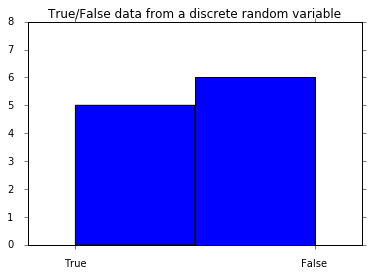

In [318]:
%matplotlib inline
plt.xlim(-0.2, 1.2)
plt.ylim(0,8)
plt.tick_params(direction="right", pad=10)
plt.xticks(np.arange(2),("True", "False"))
plt.title("True/False data from a discrete random variable")
plt.hist(binary, 2) #Plots a histogram with two bins

The chart above represents a sample of data from a larger data set. This is fundamentally the idea behind samples and populations. 

## Descriptive and Inferential Statistics

* The process of describing a set of data with sample and population metrics is descriptive statistics
* The process of inferring something from a data set about the larger behaviour of the population is inference.

## Samples and Populations

* Population: When analyzing data, all the data of a certain type that fits a specific description is called a population
* Sample: Subsets of this data collected for analysis, are called samples.

### Sample Statistics and Population Parameters
* Sample statistics are descriptors of samples
    * Sample mean $\bar X$
    * Sample variance $s^2$
    * Sample standard deviation $ s $
* Population parameters are descriptors of populations
    * Population mean $\mu $
    * Population variance $\sigma^2$
    * Population standard deviation $\sigma$
    
Other measures of samples and populations: proportion (discrete data), range, mean absolute deviation, variance, moving average (for sample sizes of 1), etc.

### Typical Sampling approaches
* Simple random 
* Systematic sampling
* Stratified sampling

### Why are sampling and inferential statistics important to study?
* A lot of machine learning algorithms are built on top of descriptive and inferential statistical approaches
* ML algorithms use inferential statistics heavily, and are often based on hypothesis testing
* Even if we have exabytes of data, inferential statistics is required in order to construct models that can predict future behaviour of systems and processes

## Frequentist and Bayesian statistics

### Frequentist statistics:
* Data are modelled using mathematical distributions and their functions
* Inferences are based on assumptions of goodness of fit between data and distributions
* Suitable for statistical engineering situations and aggregate data
* Unsuitable for situational data, and when we have to respond to collected data based on algorithms

### Bayesian Statistics:
* Data modeling is done on events, sample spaces, conditional probability: prior, belief and posterior distributions
* Does not assume goodness of fit, such as normality
* Difficult to put into aggregate situations, because a lot of data is aggregate
* Suitable for putting into data-response situations



## Events and sample spaces

In [15]:
#the set below indicates a model of how a 6 sided dice would behave
#this kind of set is called a sample space

dice = (1,2,3,4,5,6)

An experiment is when we throw the dice, and it lands a number. The number being equal to some specific value may be considered an event. The dice variables represents the set of all possible outcomes $S = \{1,2,3,4,5,6\}$ while a sample of one or three items taken from the set (with replacement) may look like $x = \{1\}$ or $y = \{1,4,6\}$

In [123]:
import random
sample = random.sample(dice, 1)
print "Sample from a single dice roll: ",sample

#Just like in the above case, we can sample multiple values (3, 4, 5, etc, with replacement).

sample3 = random.sample(dice,3)
print "Sample from rolling 3 dice: ", sample3

Sample from a single dice roll:  [6]
Sample from rolling 3 dice:  [3, 2, 4]


## Discrete Random Variables

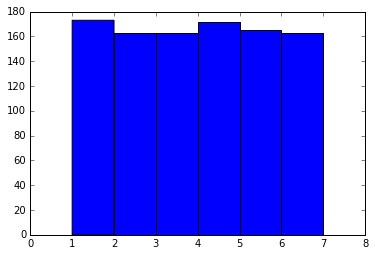

In [124]:
#Equal chance of getting any number from 1 to 6 on one dice roll

samples =[]
for i in range(1,1000,1):
    samples.append(random.sample(dice,1)[0]) ## Function randomly picks one side of the dice

#print samples
plt.xlim(0,8)
plt.hist(samples, [1,2,3,4,5,6,7])
plt.show()

## Impact of samples on central tendency

When we collect samples, aggregate behaviour tends to become visible from the sampling process. We can therefore understand the central tendency of a process or system by studying the sample statistics.

For example, if we take a sample of size n = 3, $ c = \{1,3,5\}$ from the set "dice", we can estimate its mean to be $\bar c = 3$. If we repeat this sampling experiment, and plot the means on a histogram, we get a normal distribution, for a large number of n and a large enough number of samples. Further, as we keep increasing number of sample size, we get better and better estimates of the true mean of the population.

This phenomenon is called "Central Limit Theorem".

When we take samples from a probability distribution such as this one, we are bound to get slightly different proportions and errors in estimates as a result. In the above case, we should have got 2000 counts of each number when we did 12000 dice rolls. However, these numbers aren't exactly the same. This is called "common cause variation" in statistics and statistical engineering.

## Central Limit Theorem for Discrete Random Variables

999


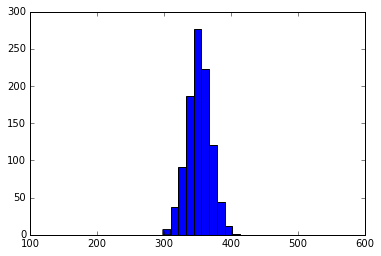

In [271]:
#For n samples:

#Now let us try sampling three consecutive rolls and add them up

#You would expect that as we roll the dice 1 time, we should have an equal chance of getting any number from 1 to 6
iterations = 1000
samples =[]
N = 100
for i in range(1,iterations,1):
    sample = np.random.choice(dice,N,replace=True)
    samples.append(sum(sample))

print len(samples)
bins = range(N,6*N,1)
plt.xlim(N*1,N*6)
plt.hist(samples)
plt.show()

## Central Limit Theorem for Continuous Random Variables

Continuous variables are infinitely divisible and could hold all real values. Sometimes they are bounded (examples are length, time, which are bounded by zero on one side, or systemic upper constraints according to how they're measured).

We'll take some samples from the uniform distribution and plot them here.

(array([ 49899.,  50234.,  50098.,  50027.,  50212.,  49904.,  49708.,
         49661.,  50148.,  50176.,  49919.,  49795.,  50113.,  50353.,
         50087.,  49843.,  50213.,  49873.,  49871.,  49866.]),
 array([  1.05691973e-06,   5.00009856e-02,   1.00000914e-01,
          1.50000843e-01,   2.00000772e-01,   2.50000700e-01,
          3.00000629e-01,   3.50000558e-01,   4.00000486e-01,
          4.50000415e-01,   5.00000344e-01,   5.50000272e-01,
          6.00000201e-01,   6.50000130e-01,   7.00000058e-01,
          7.49999987e-01,   7.99999916e-01,   8.49999844e-01,
          8.99999773e-01,   9.49999702e-01,   9.99999631e-01]),
 <a list of 20 Patch objects>)

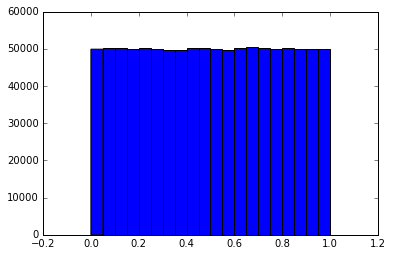

In [153]:
#Defining a continuous variable x pulled from the random uniform distribution (continuous)

x = np.random.uniform(size=10**6)

plt.xlim(-0.2, 1.2)
plt.hist(x, bins = 20)

Any value between 0 and 1 has an equal chance of occurrence in the uniform distribution. We see that for 1 million points, the distribution and the sample look very close to one another. We also see the common cause variation of the data.

Question: At this stage, if you were to estimate the mean of the above data set of $10^6$ points, what would it most likely be? 

## Standard Error and Sampling

Standard error is defined as:
$$
SE_\bar{x} = \frac{\sigma} {\sqrt {n}}
$$

For samples, 

$$
SE_\bar{x} = \frac{s} {\sqrt {n}}
$$

* In general, the larger the number of samples, the lower the standard error of a sample.
* Better standard error means lesser chance of a data point being far away from the sample mean
    * In small samples, standard error will be high
    * In large samples, standard error will be low
    
Standard error is used to compute confidence intervals. Confidence intervals are the plausible range of values where the population's metric can be found to lie, based on a sample descriptor, and the variability in the data set.

$$
CI = Sample \ statistic \pm Margin \ of \ error 
$$

Margin of error is calculated using the t distribution, the number of data points in the sample and the confidence level. Empirically, the margin of error is calculated as the product of t-statistic (taken as 1.96 for 95% confidence level) and standard error.

$$
ME_x = 1.96 \frac{s}{\sqrt n}
$$

Standard error of means:  0.05727676242


(array([   17.,   109.,   473.,  1439.,  2456.,  2736.,  1828.,   693.,
          211.,    38.]),
 array([-21.23472347, -17.1669767 , -13.09922992,  -9.03148315,
         -4.96373637,  -0.8959896 ,   3.17175718,   7.23950395,
         11.30725073,  15.3749975 ,  19.44274427]),
 <a list of 10 Patch objects>)

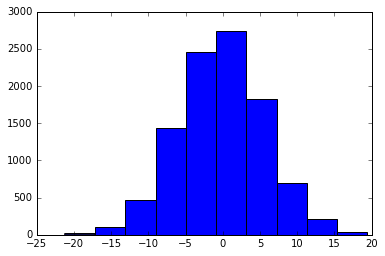

In [273]:
#If we sample from this set x, we can demonstrate CLT for continuous data

subgroupsize = 5
samples = 10000
csample = []
for i in range(0,samples,1):
    sample = np.random.choice(x,N)
    csample.append(sum(sample))


print "Standard error of means: ", stats.sem(csample)
plt.hist(csample, bins=10)


## Impact of Subgroup Size on Standard Error

Standard error = s/sqrt(N); reduces significantly with change in subgroup size.


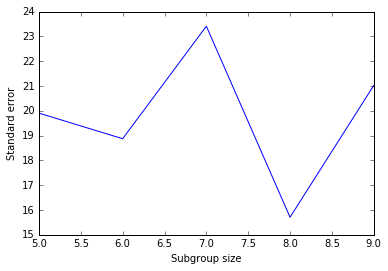

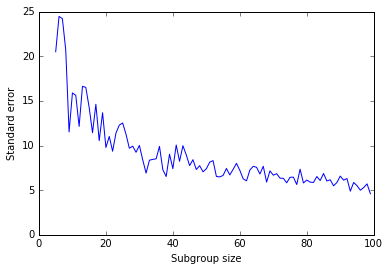

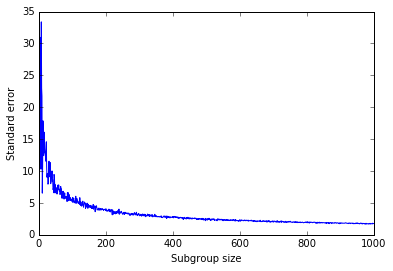

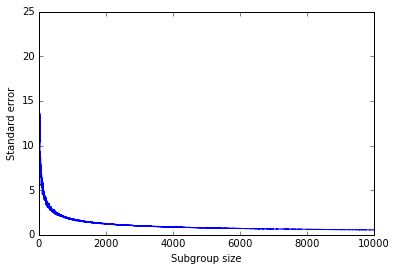

In [288]:
#function to plot sample standard error for different sizes of samples from 5 to "size"
def stderr(size):
    subgroup_sizes = range(5,size,1)
    m = 100
    s = 55
    stderrors = []
    means = []
    for N in subgroup_sizes:
        nsample = np.random.normal(m,s,N)
        stderrors.append(stats.sem(nsample))
        means.append(np.mean(nsample))
#    print "subgroup sizes", "sample means"
#   for (x,y) in zip(subgroup_sizes,means):
#       print x,"\t\t",y
    
    plt.plot(subgroup_sizes, stderrors)
    plt.xlabel("Subgroup size")
    plt.ylabel("Standard error")
    plt.show()

print "Standard error = s/sqrt(N); reduces significantly with change in subgroup size."
stderr(10)
stderr(100)
stderr(1000)
stderr(10000)

*** As the subgroup size keeps increasing, the standard error of the mean decreases asymptotically. ***

* When the subgroup size is high, the standard error is low, and therefore, we have a closely spaced confidence interval.
* When the subgroup size is small, the standard error is high, and therefore, the confidence interval is widely spaced.

## Various continuous probability distributions

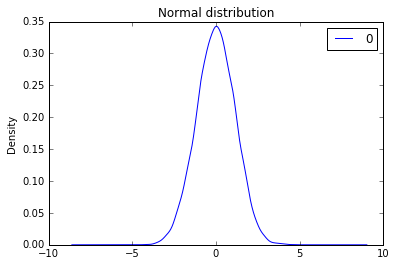

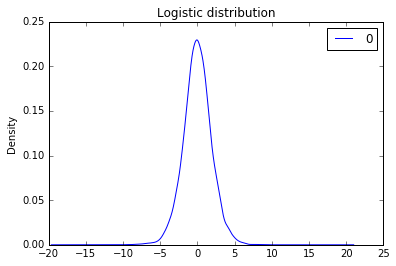

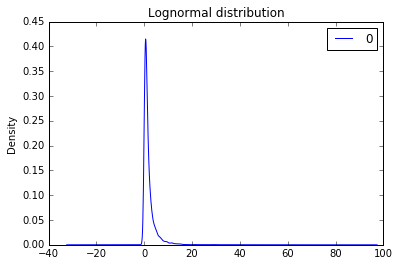

In [185]:
size = 10000
import pandas as pd #Pandas is a library used to create and manipulate data frames
x = np.linspace(-1,1,size)


norm = pd.DataFrame(data=np.random.normal(x))
norm.plot(kind="density", title = "Normal distribution")

logist = pd.DataFrame(data=np.random.logistic(x))
logist.plot(kind="density", title = "Logistic distribution")

lognorm = pd.DataFrame(data = np.random.lognormal(x))
lognorm.plot(kind="density", title = "Lognormal distribution")


## Just like with random data, we can try data from any of these distributions to demonstrate CLT

In [90]:
#lognormal distribution

size = 10000
x = np.linspace(-1,1,size)
y = np.random.lognormal(x)

def test_clt_sum(subgroupsize, times):
    samples = []
    for i in range(0,times,1):
        sample = np.random.choice(y,subgroupsize)
        samples.append(np.sum(sample))
    pd.DataFrame(samples).plot(kind="hist", title = "CLT on sum statistic. Subgroup: "+str(N)+" Samples: "+str(times))    

def test_clt_mean(subgroupsize, times):
    samples = []
    for i in range(0,times,1):
        sample = np.random.choice(y,subgroupsize)
        samples.append(np.mean(sample))
    pd.DataFrame(samples).plot(kind="hist", title = "CLT on mean statistic. Subgroup: "+str(N)+" Samples: "+str(times))    

def test_clt_std(subgroupsize, times):
    samples = []
    for i in range(0,times,1):
        sample = np.random.choice(y,subgroupsize)
        samples.append(np.std(sample))
    pd.DataFrame(samples).plot(kind="hist", title = "CLT on standard dev. Subgroup: "+str(N)+" Samples: "+str(times))    


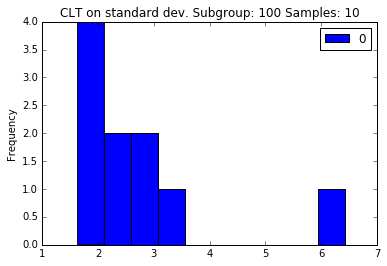

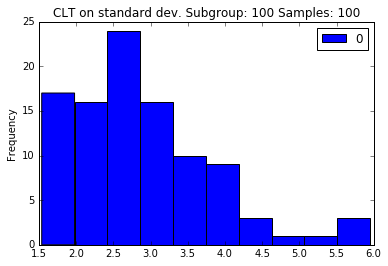

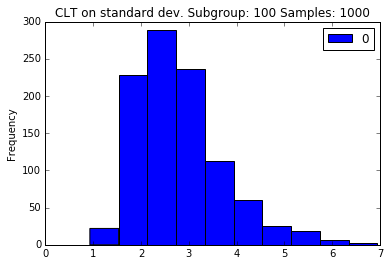

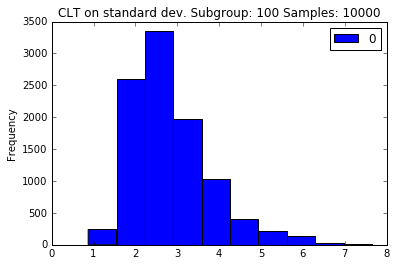

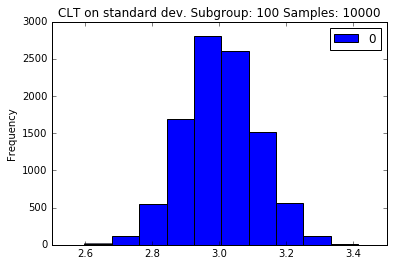

In [290]:
test_clt_std(10**2,10**1)
test_clt_std(10**2,10**2)
test_clt_std(10**2,10**3)
test_clt_std(10**2,10**4)
test_clt_std(10**4,10**4)

*** Observe that the samples (both in discrete data and continuous data) tend towards a normal distribution***

We can test the the normality assumption using the Shapiro test, or the Anderson Darling test within numpy.We can check normality of the sample we took from the data set as below.

## Basic Hypothesis testing

Hypothesis testing is the process of making a decision from data and testing theories.

The process generally evaluates a default hypothesis, called a null hypothesis.

Hypothesis roughly translates to "theory" in simple English - and the hypothesis testing approach is not much different. We essentially try to evaluate a null hypothesis and see how it holds up against different kinds of data.

** A statistical way of describing hypothesis testing is "using the sample statistics, measures of variability and confidence levels to understand whether a null hypothesis can be rejected" **

Here's more about hypothesis tests: http://stattrek.com/hypothesis-test/hypothesis-testing.aspx 

### Type I and Type II errors: 

Two types of errors can result from a hypothesis test

* Type I error. A Type I error occurs when the researcher rejects a null hypothesis when it is true. The probability of committing a Type I error is called the significance level. This probability is also called alpha, and is often denoted by $\alpha$.

*  Type II error. A Type II error occurs when the researcher fails to reject a null hypothesis that is false. The probability of committing a Type II error is called Beta, and is often denoted by $\beta$. The probability of not committing a Type II error is called the Power of the test.

***Choosing the power of a test is almost as important as significance level.*** 

For an Anderson test,

$H_o$: "Data is normally distributed"

$H_a$: "Data is not normally distributed"

In hypothesis testing we are tasked with rejecting the null hypothesis after finding sufficient evidence. This evidence comes in the form of a test statistic which is compared with a critical value. In an A-D test (Anderson test is also called Anderson-Darling test), the A statistic is calculated.

In the following code, we'll review how to do a simple statistical test to determine normality of a sample of data.

In [164]:
import scipy.stats as stats

normal_sample = np.random.normal(10,1,100)
lognormal_sample = np.random.lognormal(10,1,100)

A, crit,sig = stats.anderson(normal_sample, dist="norm") 

print "Hypotheses of the Anderson test: \nH_0 (null): \"Data is from a normal distribution\" \nH_a (alternate): \"Data is not from a normal distribution\" "
print "\nIf the A statistic from the Anderson test is greater than the critical value, reject the null hypothesis of the test."
for (s, crit) in zip (sig, crit):
    print "Significance: "+str(s)+" Critical value: "+str(crit)
print "The A statistic value: "+str(A)

print "\nTesting hypothesis of normality against a lognormal dist sample."

A, crit,sig = stats.anderson(lognormal_sample, dist="norm") 

print "Hypotheses of the Anderson test: \nH_0 (null): \"Data is from a normal distribution\" \nH_a (alternate): \"Data is not from a normal distribution\" "
print "\nIf the A statistic from the Anderson test is greater than the critical value, reject the null hypothesis of the test."
for (s, crit) in zip (sig, crit):
    print "Significance: "+str(s)+" Critical value: "+str(crit)
print "The A statistic value: "+str(A)


Hypotheses of the Anderson test: 
H_0 (null): "Data is from a normal distribution" 
H_a (alternate): "Data is not from a normal distribution" 

If the A statistic from the Anderson test is greater than the critical value, reject the null hypothesis of the test.
Significance: 15.0 Critical value: 0.555
Significance: 10.0 Critical value: 0.632
Significance: 5.0 Critical value: 0.759
Significance: 2.5 Critical value: 0.885
Significance: 1.0 Critical value: 1.053
The A statistic value: 0.888342859737

Testing hypothesis of normality against a lognormal dist sample.
Hypotheses of the Anderson test: 
H_0 (null): "Data is from a normal distribution" 
H_a (alternate): "Data is not from a normal distribution" 

If the A statistic from the Anderson test is greater than the critical value, reject the null hypothesis of the test.
Significance: 15.0 Critical value: 0.555
Significance: 10.0 Critical value: 0.632
Significance: 5.0 Critical value: 0.759
Significance: 2.5 Critical value: 0.885
Signific

### How to make sense of the critical value and significance

* If we have a test statistic that is greater than the critical value, we reject the null hypothesis.
* The probability that we will incorrectly reject the null hypothesis is given by the significance of the result

In the above case, for normal_sample, we have a significance level of 1.0% and corresponding critical value of 1.053. This is greater than the A statistic of 0.889, which means we fail to reject the null hypothesis $H_0$.

In case of lognormal_sample, we can safely reject the null hypothesis $H_0$ since the critical value 1.053 is far smaller than the A statistic. In fact, we can reject the null hypothesis even if the significance is 15%!


### Another approach is to use a Shapiro-Wilk test, which returns a W statistic and a p-value


In [166]:
sig = 1.0
Wn, pvaln = stats.shapiro(normal_sample)
Wl, pvall = stats.shapiro(lognormal_sample)

print "p-value for Shapiro test (normal_sample): ", pvaln
print "p-value for Shapiro test (lognormal_sample): ", pvall

print "Refer the significance level of your test (in %) to understand how to interpret this result"

p-value for Shapiro test (normal_sample):  0.0579043924809
p-value for Shapiro test (lognormal_sample):  1.61788104073e-13
Refer the significance level of your test (in %) to understand how to interpret this result


The Shapiro test is sensitive to large sizes of data. It is a commonly used test, but Anderson-Darling is more popular. In this case, the p-value for the normal data set is close to 0.05. If we have a critical value of p as 0.05 (which is very common) this could be a statistically significant result.

## Significance Levels and P-values in Hypothesis tests

If we have a significance level of 0.05, or 5%, and our p-value is 0.5, or 50%, we can interpret it as follows:

Assuming that the null hypothesis is true (i.e., assuming that the data is normal), there is a 50% chance that we will see the same extreme values we see now from the population from which this sample was taken. Since a 50% chance of finding normally distributed data is far higher than the <=5% chance we would need to conclude that the sample is not normal, we cannot reject the null hypothesis.

***Alternate scenario***

p = 0.001. If our significance level is 0.05, and we have a p value far lesser, here's how to interpret it in frequentist statistics.

Assuming that the null hypothesis is true (i.e., assuming that the data is normal), there is a 0.1% chance that we will see the same extreme values we see now from the population from which this sample was taken. Since this is a very small probability of seeing normally distributed data from the population, we conclude that the data does not come from a normally distributed population.


### Now we'll see a few frequentist hypothesis tests, for comparing samples, or samples to constant values.

If we have 1 sample of data, and want to compare it to a constant, we could use a 1 sample t-test.

Let's say that a certain process in an organization takes 10 seconds. We want to check if the data agrees with this claim.

Therefore,

$$H_0: \mu = 10$$
$$H_a: \mu \neq 10$$

## Comparing a sample with a constant

### Problem definition

An engineer in charge of a web server is looking at latency times for a specific operation in milliseconds. He has a sample of data of latency times and wants to know if it meets his organization's standard for that server, which is 10 milliseconds. There is variability in the data, so he decides to use a 1 sample hypothesis test.

Steps followed:
* Understand whether the data can be modelled with normal confidence intervals (check for normality)
* Calculate the sample statistic (mean), measure of variability (standard deviation) and identify a confidence factor
* Calculate confidence intervals
* Check if the hypothesised mean of the process lies within the confidence intervals, and interpret the result.


           0
0  11.021862
1  10.347881
2  11.196420
3  10.434329
4  10.750884
1.0
Data is normally distributed. p-value:  1.0


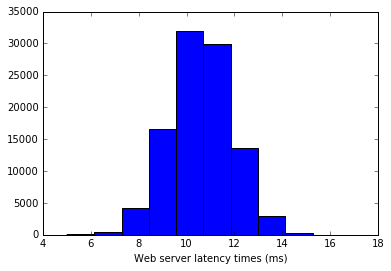


The sample does not match the constant it was compared to. Confint:  10.5927832457 10.6088877785


In [304]:
#Reading a single variable of data
sample1 = pd.read_csv("sample1.csv", index_col = 0)
#Describe the data set
print sample1.head()

#Check for normality
W,p = stats.shapiro(sample1)
print p
if(p<0.05):
    print "Data is not normally distributed. p-value: ",p 
else:
    print "Data is normally distributed. p-value: ",p

#Explore the data using a histogram
plt.xlabel("Web server latency times (ms)")
plt.hist(sample1["0"])
plt.show()

#Calculate confidence interval using a built in function in the scipy stats module
import scipy.stats as stats
confint = stats.t.interval(0.95, len(sample1)-1, np.mean(sample1), stats.sem(sample1)) ##sem = standard error of mean

if (confint[0][0]>10 or confint[1][0]<10):
    print "\nThe sample does not match the constant it was compared to. Confint: ", confint[0][0], confint[1][0]
else:
    print "Constant falls inside confidence interval estimate. Confint:", confint[0][0],"to", confint[1][0]

In this case, the engineer was able to determine that the mean latency of the web server he was in charge of was greater than 10 milliseconds.

Note: Because the mean is 10.60 ms, and the standard deviation is 1.29, there is a:
* 68.2% chance that samples of web server latency times will lie within $10.60 \pm 1 \times 1.29$. 
* 95.4% chance that samples of web server latency times will lie within $10.60 \pm 2 \times 1.29$
* 99.7% chance that samples of web server latency times will lie within $10.60 \pm 3 \times 1.29$

This is due to the properties of the normal distribution.

There are ready made functions within Scipy that allow you to do hypothesis tests. The caveat is that you should check for normality first. As we will see, variance checking also becomes important if you're comparing 2 samples.

# 1-sample t-test

In [64]:
#There is an easier way to do the same thing: the 1-sample t-test, which assumes normality

tstat, pval = stats.ttest_1samp(sample1,10)

print "t-statistic: ", tstat[0], "p-value: ", pval[0]

if (pval <0.05):
    print "Since p-value is much lesser than significance, we reject the null hypothesis, there is a difference between the sample and the constant"
else:
    print "The sample and the constant can be favourably compared"

t-statistic:  146.24829347 p-value:  0.0
Since p-value is much lesser than significance, we reject the null hypothesis, there is a difference between the sample and the constant


# 2 sample t-test for continuous data

### Problem description:

We have the same process implemented in two separate buildings X and Y and the management wants to know which takes less time to complete. The data here are measured for the last 10,000 process customers, and each time, the process time taken per customer has been recorded. 

In [65]:
#Let's set up 2 data sets, x and y.
#We want to check to see if they come from the same population of data
#For this, we can use frequentist hypothesis tests


import pandas as pd
data = pd.read_csv("xy.csv", index_col=0 )

In [66]:
data.describe()

#Pandas tells us some basic statistics on the data - means, standard deviations and the counts of samples in each case

,col1,col2
count,10000.000000,10000.000000
mean,10.004460,10.997291
std,1.008450,0.993051
min,6.226860,7.009765
25%,9.318706,10.341108
50%,9.998329,10.999088
75%,10.679795,11.663564
max,13.886398,14.572503


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001C0DF550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001C1F6F60>]], dtype=object)

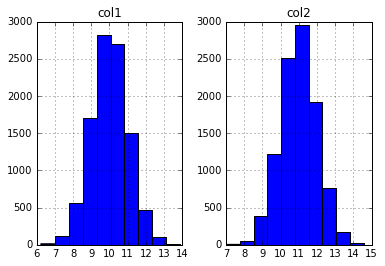

In [67]:
#Pandas has a handy plotting method built into the data frame object
data.hist()

### It is not immediately obvious whether the data are from the same population, or different ones

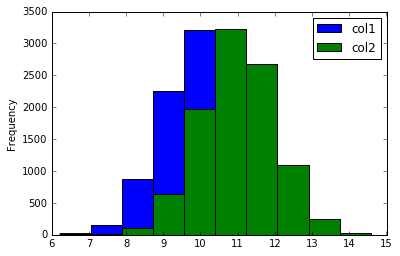

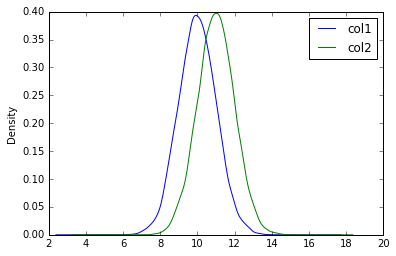

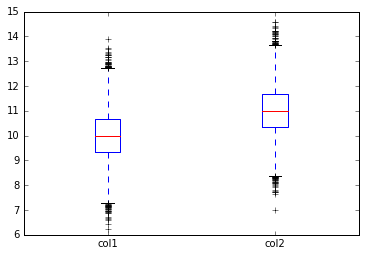

In [216]:
data.plot(kind = "hist") #Histogram, frequency plot
data.plot(kind = "density") #Density plot, which shows us the probability density / mass function of the data
data.plot(kind = "box") ##Box plot with outliers 

*** We can construct confidence intervals to tell us where the population means may lie. Confidence intervals are defined as "the plausible range of values of the population parameter, based on a sample statistic" ***

In our case, describing the pandas data frame can tell us what the sample statistics are:

In [69]:
data.describe()

,col1,col2
count,10000.000000,10000.000000
mean,10.004460,10.997291
std,1.008450,0.993051
min,6.226860,7.009765
25%,9.318706,10.341108
50%,9.998329,10.999088
75%,10.679795,11.663564
max,13.886398,14.572503


*** The sample statistic for location is the mean.***

***The sample statistic for the variability is the standard deviation.***

In [70]:
import scipy.stats as stats

#Check for normality first assuming a 95% CI

W1, p1 = stats.shapiro(data["col1"])
W2, p2 = stats.shapiro(data["col2"])

print "p1: ", p1, "p2: ", p2

if (p1>0.05 and p2 > 0.05):
    print "Both samples come from normally distributed populations."
    
#check for equal variances

B, pval = stats.bartlett(data['col1'], data['col2'])

if (pval <0.05):
    print "Samples have different variances (5% chance that any other two samples will have the same variance)"
else:
    print "Samples come from populations which have the same variance."

p1:  0.617402493954 p2:  0.814412355423
Both samples come from normally distributed populations.
Samples come from populations which have the same variance.


In [71]:
#Once the samples are known to come from normal distributions, we can construct 95% normal CIs (confidence intervals)

x,y = data["col1"], data["col2"]

print "Confidence interval for column 1: ",stats.t.interval(0.95, len(x)-1, np.mean(x), stats.sem(x) )
print "Confidence interval for column 2: ",stats.t.interval(0.95, len(y)-1, np.mean(y), stats.sem(y) ) 

Confidence interval for column 1:  (9.9846921354809481, 10.024227419220491)
Confidence interval for column 2:  (10.977825172719148, 11.016756770169872)


Since the 95% confidence intervals we calculated don't overlap, we reject the null hypothesis that these samples come from the same population. We can tell that the data sets may not come from the same population, from the histograms. However, we can prove this statistically, also.

*** We can do the same comparison in less time, using the t-test built into scipy.stats. However, this makes the normality and variance assumptions we checked automatically ***

In [72]:
import scipy.stats as stats

tstat,pval = stats.ttest_ind(data["col1"], data["col2"])

if (pval <0.05):
    print "The samples come from the same population.", "p-val: ", pval
else:
    print "Samples come from populations with distinct means"

The samples come from the same population. p-val:  0.0


In [219]:
##Now, let us do the same statistical test for a different data set. We can automate the reading and basic analysis within Python

def compare_means(x):
    data = pd.read_csv(x, index_col = 0)
    print data.describe(), "\n"
    
    #Normality check
    W1,p1 = stats.shapiro(data["col1"])
    W2,p2 = stats.shapiro(data["col2"])
    
    if (p1 <0.05 or p2 <0.05):
        print "At least one of the data sets is not normally distributed."
    else: 
        print "Both data sets are from normally distributed populations \n(<5% chance that two more samples from the same population will be non-normal)"
    
    #Variance test
    B, pval = stats.bartlett(data['col1'], data['col2'])
    if (pval <0.05):
        print "Samples have different variances \n(5% chance that any other two samples will have the same variance)\n"
    else:
        print "Samples come from populations which have the same variance.\n(<5% chance that any other two samples will have different variances)"
    #Once the samples are known to come from normal distributions, we can construct 95% normal CIs (confidence intervals)

    x,y = data["col1"], data["col2"]
    print "Confidence intervals for both samples (assuming normality) are:"
    print stats.t.interval(0.95, len(x)-1, np.mean(x), stats.sem(x) )
    print stats.t.interval(0.95, len(y)-1, np.mean(y), stats.sem(y) ) 
    
    
    #t-test for 2 normal samples with equal variances
    tstat,pval = stats.ttest_ind(data["col1"], data["col2"])

    if (pval <0.05):
        print "The samples come from the same population.", "p-val: ", pval,"\n"
    else:
        print "Samples come from populations with distinct means\n"
        
    data.hist()
    data.plot(kind="hist", title = "Overlapping Histogram")
    data.plot(kind="density", title = "Probability density plot")
    data.plot(kind = "box", title = "Box plot")
    

               col1          col2
count  10000.000000  10000.000000
mean      10.015437     10.085274
std        0.995564      1.813178
min        6.052090      2.612968
25%        9.338000      8.845540
50%       10.022896     10.073642
75%       10.690834     11.328145
max       13.703127     16.847509 

Both data sets are from normally distributed populations 
(<5% chance that two more samples from the same population will be non-normal)
Samples have different variances 
(5% chance that any other two samples will have the same variance)

Confidence intervals for both samples (assuming normality) are:
(9.9959220788359513, 10.034952190603173)
(10.049731803503935, 10.120815697227787)
The samples come from the same population. p-val:  0.000736429275134 



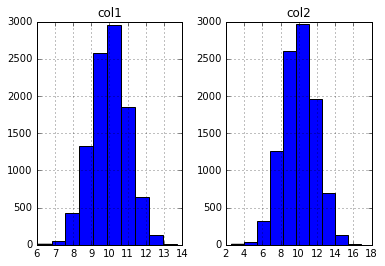

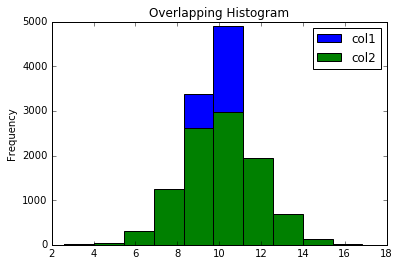

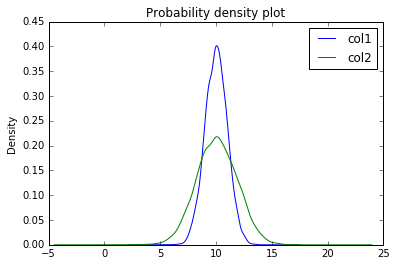

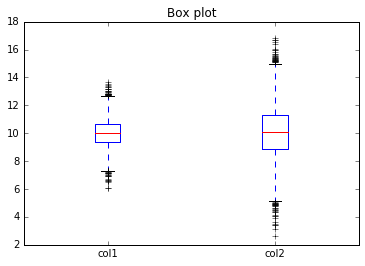

In [220]:
compare_means("xy3.csv")

#We take a different set of x and y data. How does this perform? How do you interpret this?

Note: Data visualization can be a useful source of hypotheses. Observe how there's a narrower histogram/density plot for a more closely spaced data set, compared to a wider data set. This could potentially help us formulate a standard deviation hypothesis, which can be tested by the Bartlett test (for normally distributed data).

# Reference Material

* Dropbox book: Introduction to Probability and Statistics Using R - https://www.dropbox.com/s/h1qw9uxndw1a0p8/Introduction_To_Probability_and_Statistics_Using_R.pdf?dl=0 
* Montgomery et al, book on "Applied Statistics and Probability for Engineers" ( I have a physical copy)
* Dropbox book: James, Hastie and Tibshirani's book "Introduction to statistical learning" - https://www.dropbox.com/s/rrqmkx2a2zjti86/Introduction_To_Statistical_Learning_Hastie-Tibshirani.pdf?dl=0 
* Coursera course on Statistical Inference by Roger Peng, Jeff Leek and Brian Caffo : https://www.coursera.org/learn/statistical-inference 
* "Doing Data Science" by Rachel Schutt, et al (once you have got through some of the above books) 
* Khan Academy's excellent set of videos on statistical inference and hypothesis testing : https://www.khanacademy.org/math/probability/statistics-inferential 


# Future Topics

* Power, sample size
* ANOVA and DOE
* Correlation, Ordinary Least Squares Regression
* Gauss Markov Theorem
* Multiple Linear Regression - from linear_model in Scikit Learn
* Classification Algorithms - k-Means, kNN, LinearSVC, SVM from Classification in Scikit Learn
* Bias - Variance Tradeoff
* Cross Validation
* Grid Search Cross Validation
